In [47]:
# %pip3 install --upgrade pip
# %pip install fasttext
# %pip install pandas
# %pip install sklearn

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocess, evaluate

In [49]:
# create an instance of the Preprocess class
preprocess = preprocess.Preprocess('data/CR')
test_data = preprocess.load_data('test_data')
print(f"Test data shape: {test_data.shape}")

Test data shape: (755, 2)


In [50]:
# create an instance of the Evaluate class
evaluate_model = evaluate.Evaluate('models', test_data, 'results')

In [51]:
# evaluate the performance for BERT
bert_accuracy, bert_f1_macro, bert_f1_weighted, bert_predictions = evaluate_model.evaluate_performance("BERT")

BERT Model:
----------------
Accuracy: 0.8887
Macro Average F1: 0.8777
Weighted Average F1: 0.8883
Precision: 0.8881
Recall: 0.8887
Confusion Matrix:
[[222  47]
 [ 37 449]]




In [52]:
# evaluate the performance for DistilBERT
distilbert_accuracy, distilbert_f1_macro, distilbert_f1_weighted, distilbert_predictions = evaluate_model.evaluate_performance("DistilBERT")

DistilBERT Model:
----------------
Accuracy: 0.8927
Macro Average F1: 0.8770
Weighted Average F1: 0.8946
Precision: 0.9002
Recall: 0.8927
Confusion Matrix:
[[202  24]
 [ 57 472]]




In [53]:
# evaluate the performance for RoBERTa
roberta_accuracy, roberta_f1_macro, roberta_f1_weighted, roberta_predictions = evaluate_model.evaluate_performance("RoBERTa")

RoBERTa Model:
----------------
Accuracy: 0.9391
Macro Average F1: 0.9328
Weighted Average F1: 0.9389
Precision: 0.9389
Recall: 0.9391
Confusion Matrix:
[[239  26]
 [ 20 470]]




In [54]:
# evaluate the performance for XLNet
xlnet_accuracy, xlnet_f1_macro, xlnet_f1_weighted, xlnet_predictions = evaluate_model.evaluate_performance("XLNET")

XLNET Model:
----------------
Accuracy: 0.9298
Macro Average F1: 0.9225
Weighted Average F1: 0.9296
Precision: 0.9296
Recall: 0.9298
Confusion Matrix:
[[235  29]
 [ 24 467]]




In [55]:
# evaluate the performance for FastText
fasttext_accuracy, fasttext_f1_macro, fasttext_f1_weighted, fasttext_predictions = evaluate_model.evaluate_performance("FastText")

FastText Model:
----------------
Accuracy: 0.7722
Macro Average F1: 0.7396
Weighted Average F1: 0.7685
Precision: 0.7675
Recall: 0.7722
Confusion Matrix:
[[158 101]
 [ 71 425]]




In [56]:
# save the predictions
evaluate_model.save_predictions(bert_predictions, distilbert_predictions, xlnet_predictions,
                                roberta_predictions, fasttext_predictions)

In [57]:
pred = pd.read_csv('results/model_predictions.csv')
pred.head(10)

,Sentence,BERT,DistilBERT,XLNet,RoBERTa,FastText,Truth_label
0,very intuitive menus are a big plus on this ca...,1,1,1,1,1,1
1,i do like this phone overall ( would give it a...,1,1,1,1,1,1
2,if you have an older version of `` internet se...,0,0,0,0,1,0
3,the disadvantages of this camera is it has bee...,0,0,0,0,1,0
4,it was a good player when it worked and i love...,1,1,1,1,1,1
5,one cabinet shop has been using one regularly ...,1,1,1,1,1,1
6,the door would not close .,0,0,0,0,0,0
7,"while , there are flaws with the machine , the...",1,1,1,1,1,1
8,the battery is replaceable ( a real plus ) and...,1,1,1,1,1,1
9,"the screen may be a little smaller , but it is...",0,0,0,0,0,0


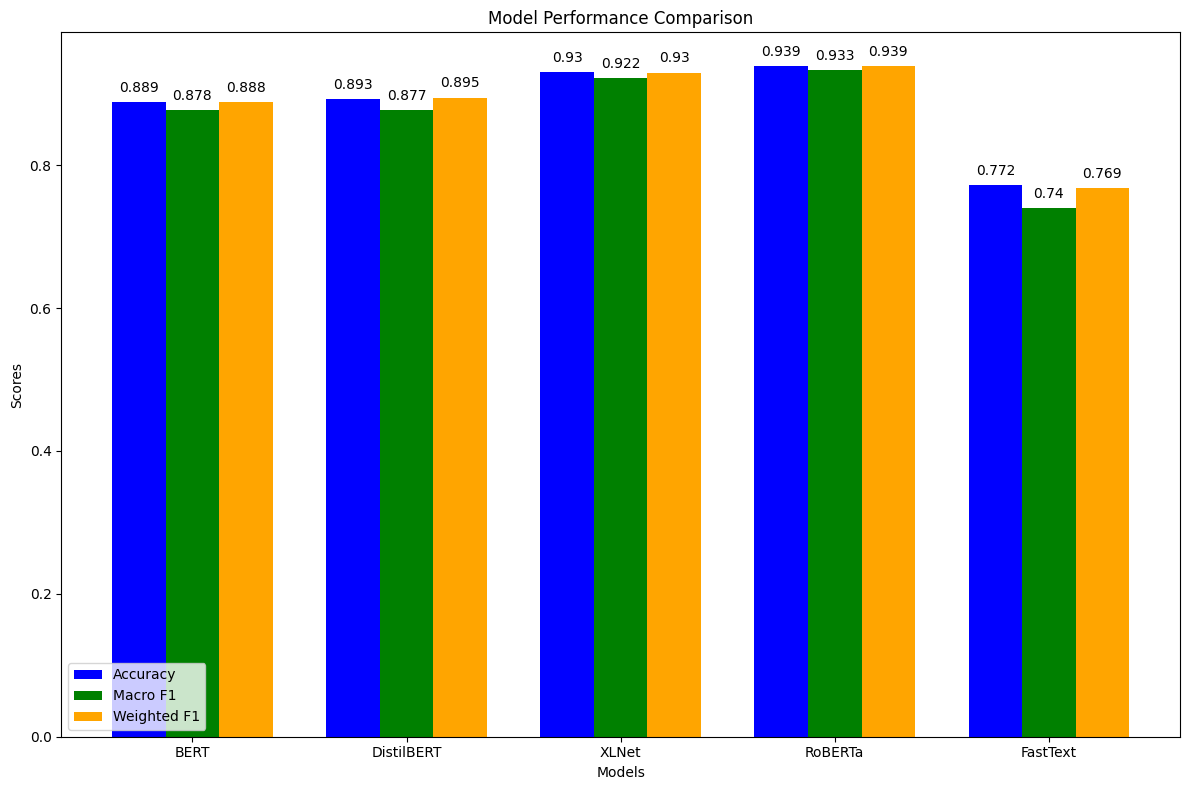

In [58]:
# plot the comparison graph with values displayed on the bars
models = ['BERT', 'DistilBERT', 'XLNet', 'RoBERTa', 'FastText']
metrics = ['Accuracy', 'Macro F1', 'Weighted F1']
bert_scores = [bert_accuracy, bert_f1_macro, bert_f1_weighted]
distilbert_scores = [distilbert_accuracy, distilbert_f1_macro, distilbert_f1_weighted]
xlnet_scores = [xlnet_accuracy, xlnet_f1_macro, xlnet_f1_weighted]
roberta_scores = [roberta_accuracy, roberta_f1_macro, roberta_f1_weighted]
fasttext_scores = [fasttext_accuracy, fasttext_f1_macro, fasttext_f1_weighted]

fig, ax = plt.subplots(figsize=(12, 8)) 
bar_width = 0.25
bar_positions = np.arange(len(models))

# change the bar colors
colors = ['blue', 'green', 'orange']

for i, metric in enumerate(metrics):
    ax.bar(bar_positions + i * bar_width, [bert_scores[i], distilbert_scores[i], xlnet_scores[i],
                                            roberta_scores[i], fasttext_scores[i]], bar_width,
            color=colors[i],
            label=metric)

# add text annotations above each bar
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        value = round([bert_scores[j], distilbert_scores[j], xlnet_scores[j], roberta_scores[j],
                        fasttext_scores[j]][i], 3)
        ax.text(bar_positions[i] + j * bar_width, [bert_scores[j], distilbert_scores[j], xlnet_scores[j],
                                                    roberta_scores[j], fasttext_scores[j]][i] + 0.01,
                f'{value}', ha='center', va='bottom', color='black') 

ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(models)
ax.legend(loc='lower left')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.tight_layout()  # ensure tight layout to avoid overlapping text
plt.savefig('results/class_compare.png')
plt.show()